PROBLEM STATEMENT
The goal is to analyze Amazon's last-mile delivery dataset to uncover key factors affecting delivery efficiency and customer satisfaction. By examining variables such as weather, traffic, agent performance, and delivery delays, we aim to identify bottlenecks and optimize delivery operations. This analysis will help Amazon improve on-time delivery rates, better allocate resources, and enhance the overall customer experience.

TARGET COLUMN-->Delivary time

| Column Name      | Description                                                                 |
| ---------------- | --------------------------------------------------------------------------- |
| Order\_ID        | Unique identifier for each delivery order                                   |
| Agent\_Age       | Age of the delivery agent (in years)                                        |
| Agent\_Rating    | Customer-given rating of the delivery agent (scale 1-5)                     |
| Store\_Latitude  | Latitude coordinate of the store location                                   |
| Store\_Longitude | Longitude coordinate of the store location                                  |
| Drop\_Latitude   | Latitude coordinate of the delivery/drop location                           |
| Drop\_Longitude  | Longitude coordinate of the delivery/drop location                          |
| Order\_Date      | Date when the order was placed                                              |
| Order\_Time      | Time when the order was placed                                              |
| Pickup\_Time     | Time when the order was picked up by the agent                              |
| Weather          | Weather condition during the delivery                                       |
| Traffic          | Traffic condition during the delivery                                       |
| Vehicle          | Type of vehicle used for the delivery                                       |
| Area             | Type of area where delivery is made (Urban, Metropolitan, Semi-Urban, etc.) |
| Delivery\_Time   | Total time taken to deliver the order (in minutes)                          |
| Category         | Product category of the order                                               |


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Fix the import statement for matplotlib
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor



In [2]:
df=pd.read_csv('amazon_delivery.csv.zip')

In [3]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
df.tail()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


In [5]:
df.shape

(43739, 16)

In [6]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [8]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


FILLING ALL NULL VALUES

In [9]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df['Agent_Rating']=df['Agent_Rating'].fillna(df['Agent_Rating'].median())
df['Weather']=df['Weather'].fillna(df['Weather'].mode()[0])


In [12]:
df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

FINDING OUTLIERS

In [63]:
sns.set_palette("Set2") 

<Axes: xlabel='Agent_Age'>

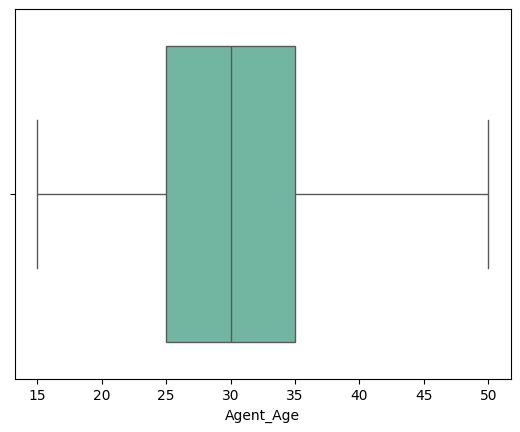

In [43]:
sns.boxplot(x='Agent_Age',data=df)

<Axes: xlabel='Agent_Rating'>

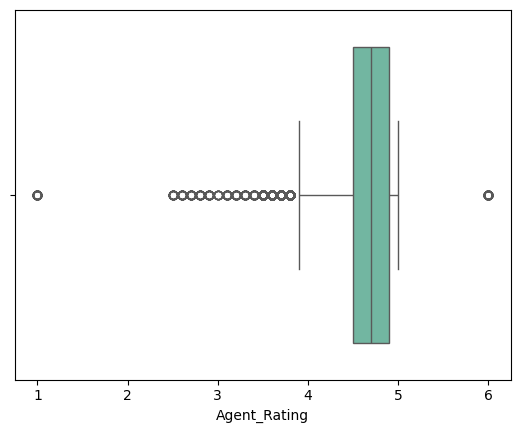

In [44]:
sns.boxplot(x='Agent_Rating',data=df)

<Axes: xlabel='Store_Latitude'>

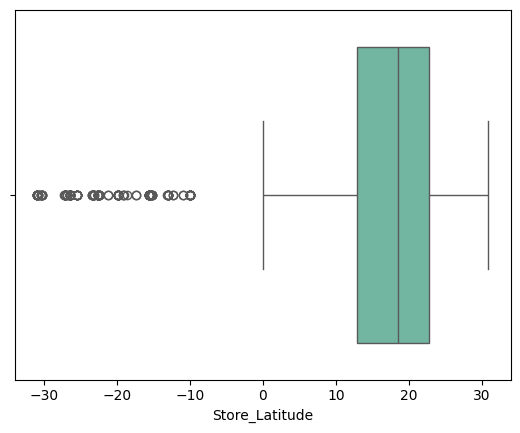

In [71]:
sns.boxplot(x='Store_Latitude',data=df)

In [73]:
df=df[df['Store_Latitude']<df['Store_Latitude'].quantile(0.99)]

<Axes: xlabel='Store_Latitude'>

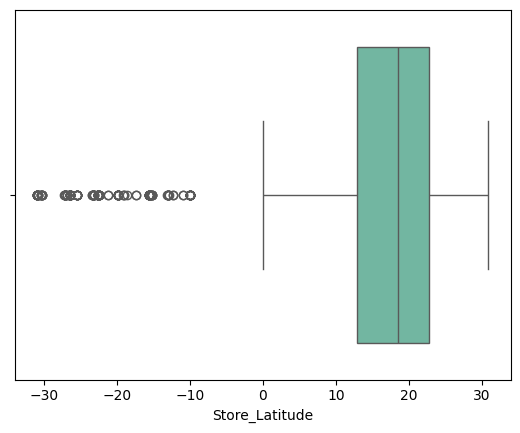

In [74]:
sns.boxplot(x='Store_Latitude',data=df)

<Axes: xlabel='Store_Longitude'>

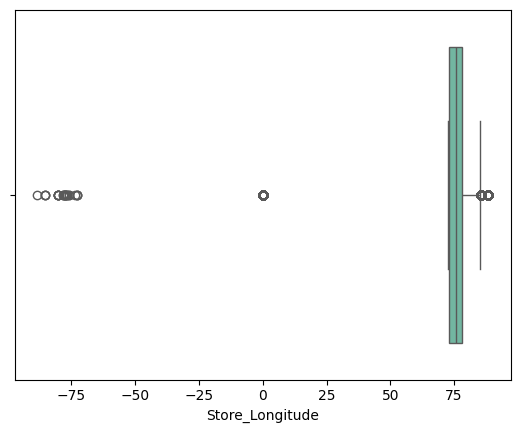

In [46]:
sns.boxplot(x='Store_Longitude',data=df)

<Axes: xlabel='Store_Longitude'>

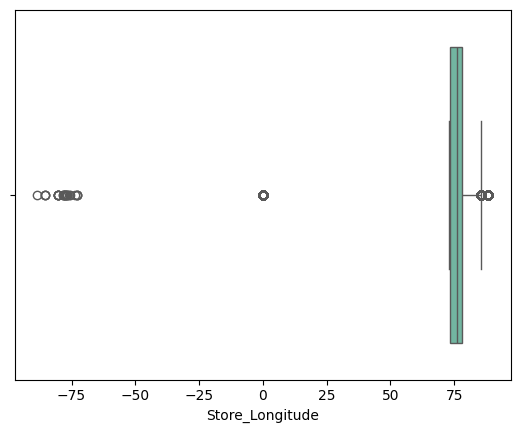

In [86]:
df=df[df['Store_Longitude']<df['Store_Longitude'].quantile(0.99)]
sns.boxplot(x='Store_Longitude',data=df)

<Axes: xlabel='Drop_Latitude'>

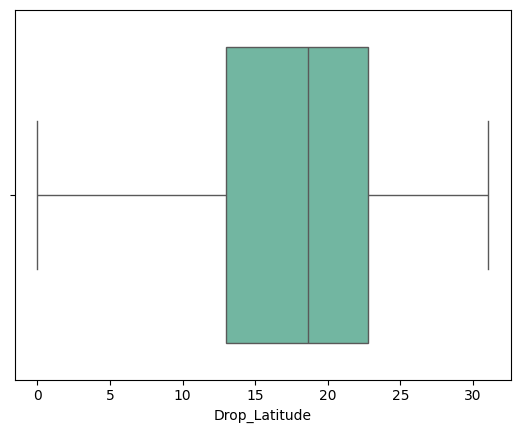

In [47]:
sns.boxplot(x='Drop_Latitude',data=df)

<Axes: xlabel='Drop_Longitude'>

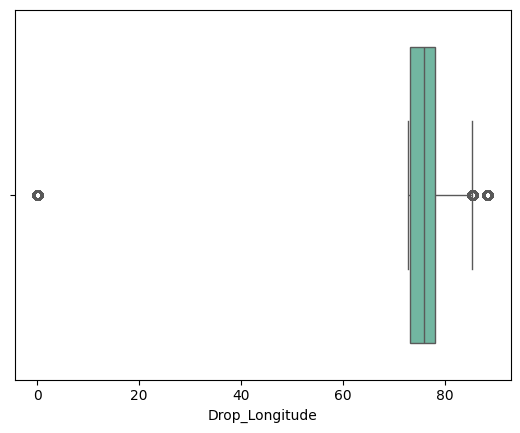

In [48]:
sns.boxplot(x='Drop_Longitude',data=df)

<Axes: xlabel='Delivery_Time'>

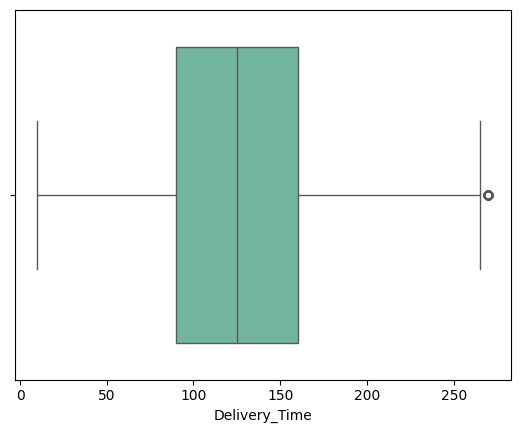

In [49]:
sns.boxplot(x='Delivery_Time',data=df)

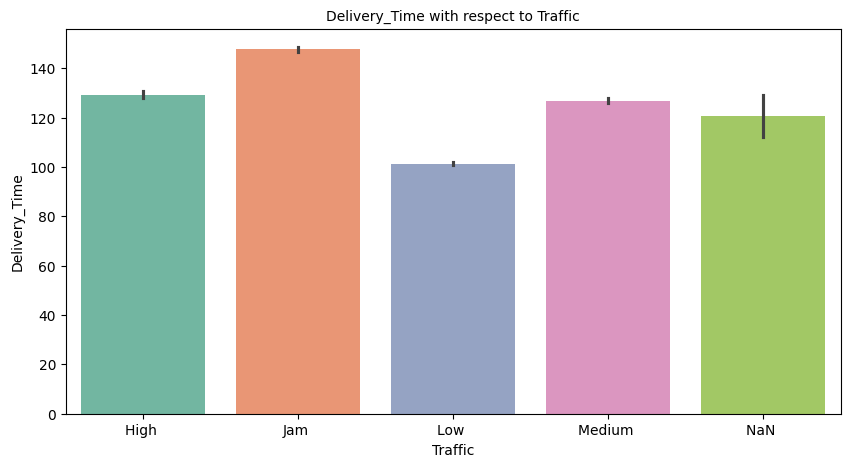

In [104]:
plt.figure(figsize=(10,5))
sns.barplot(y='Delivery_Time', x='Traffic', data=df, palette='Set2')
plt.title("Delivery_Time with respect to Traffic", fontsize=10)
plt.ylabel("Delivery_Time", fontsize=10)
plt.xlabel("Traffic", fontsize=10)
plt.show()

----Traffic congestion significantly delays delivery, especially during jams.

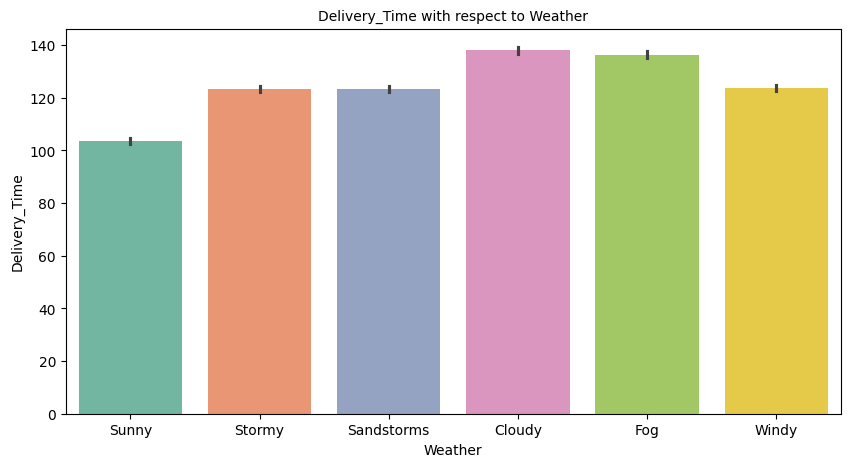

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(y='Delivery_Time', x='Weather', data=df, palette='Set2')
plt.title("Delivery_Time with respect to Weather", fontsize=10)
plt.ylabel("Delivery_Time", fontsize=10)
plt.xlabel("Weather", fontsize=10)
plt.show()

-----Poor visibility and adverse weather increase delivery times.

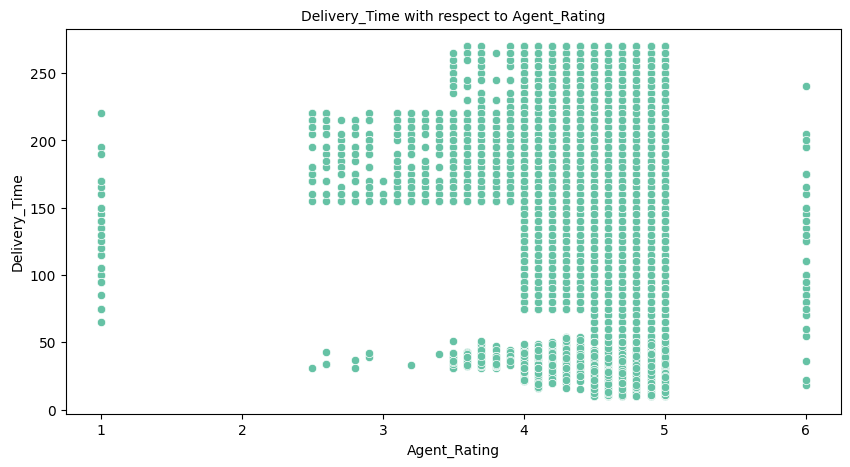

In [107]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Agent_Rating',y='Delivery_Time',data=df)
plt.title("Delivery_Time with respect to Agent_Rating", fontsize=10)
plt.ylabel("Delivery_Time", fontsize=10)
plt.xlabel("Agent_Rating", fontsize=10)
plt.show()

------Agent rating doesn’t have a strong direct correlation with delivery time, but poor ratings tend to have more extreme delays.

Text(0.5, 1.0, 'Types of Areas')

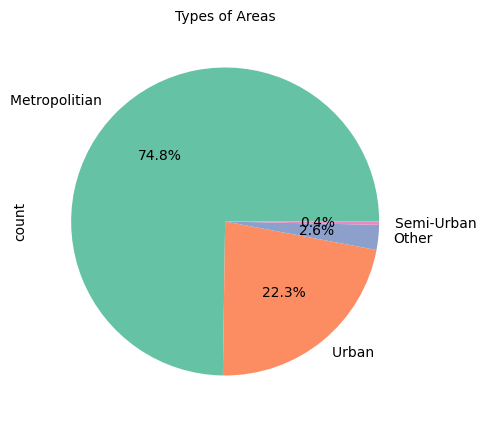

In [109]:
plt.figure(figsize=(10,5))
df['Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Types of Areas", fontsize=10)


------Delivery performance is mainly influenced by metropolitan and urban conditions.

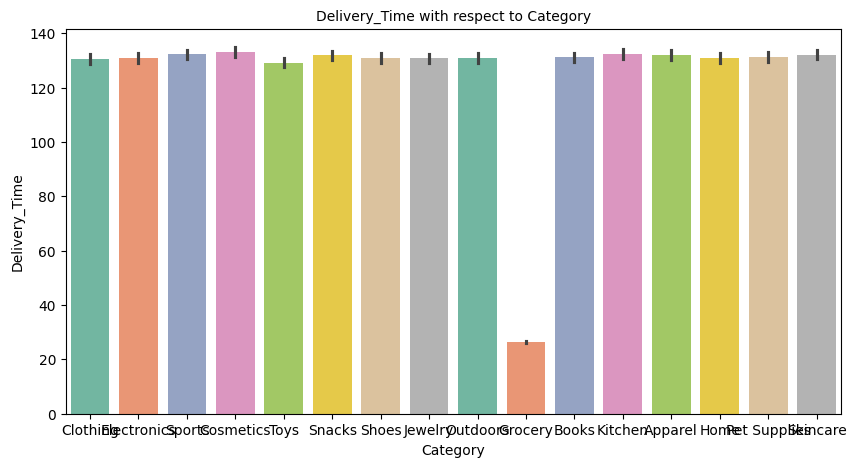

In [110]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y='Delivery_Time', data=df, palette='Set2')
plt.title("Delivery_Time with respect to Category", fontsize=10)
plt.ylabel("Delivery_Time", fontsize=10)
plt.xlabel("Category", fontsize=10)
plt.show()

-----Grocery likely has priority delivery, while other items have standard delivery schedules.


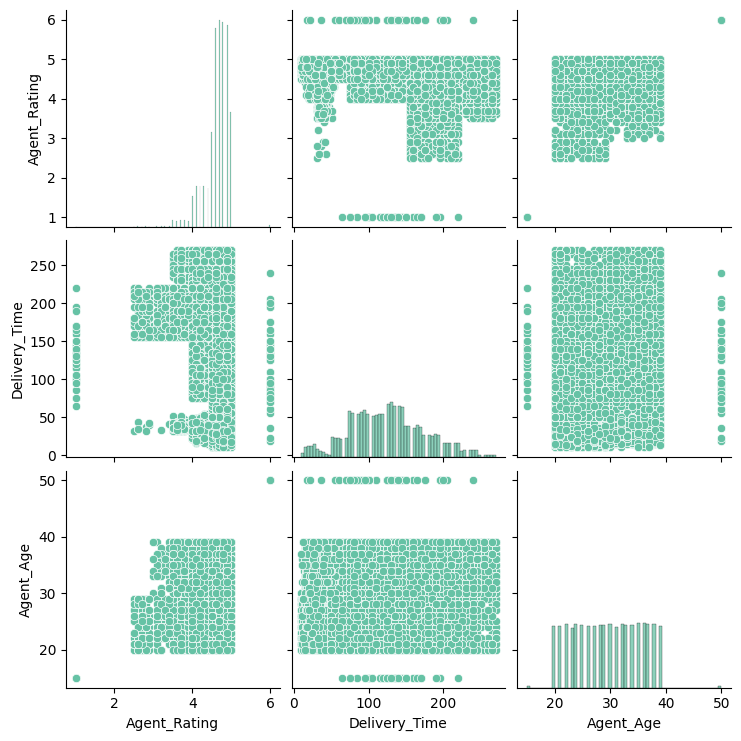

In [66]:
sns.pairplot(df[['Agent_Rating', 
       'Delivery_Time','Agent_Age' ]])


Text(0.5, 1.0, 'Distribution based on types of vehicles')

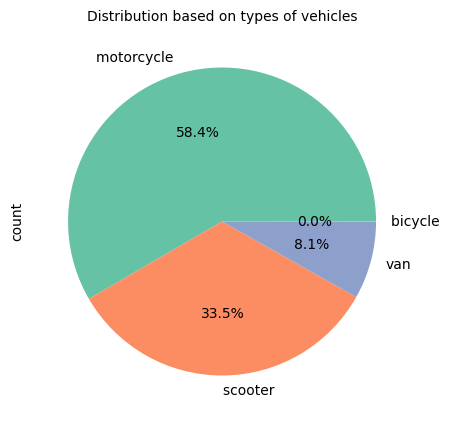

In [112]:
plt.figure(figsize=(10,5))
df['Vehicle'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribution based on types of vehicles", fontsize=10)


------The majority of deliveries rely on two-wheelers, which are generally faster in congested areas.


<Axes: >

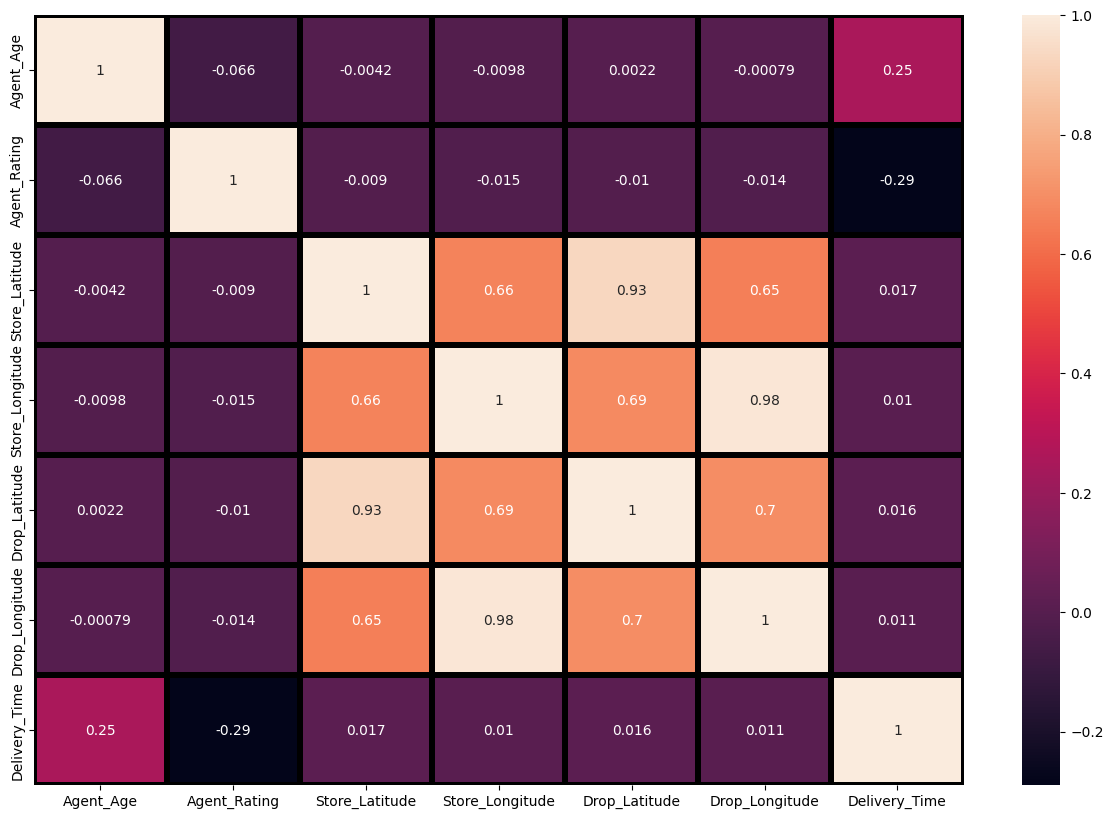

In [113]:
num=df.select_dtypes(include='number')
correlation=num.corr()
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(),annot=True,linewidths=4,linecolor='k')

most corelated columns are:
1) drop_latitude and longitude
2) store_longitude and drop latitude


Spliting data into train and test

In [88]:
dataset = df.copy()

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42851 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         42851 non-null  object 
 1   Agent_Age        42851 non-null  int64  
 2   Agent_Rating     42851 non-null  float64
 3   Store_Latitude   42851 non-null  float64
 4   Store_Longitude  42851 non-null  float64
 5   Drop_Latitude    42851 non-null  float64
 6   Drop_Longitude   42851 non-null  float64
 7   Order_Date       42851 non-null  object 
 8   Order_Time       42851 non-null  object 
 9   Pickup_Time      42851 non-null  object 
 10  Weather          42851 non-null  object 
 11  Traffic          42851 non-null  object 
 12  Vehicle          42851 non-null  object 
 13  Area             42851 non-null  object 
 14  Delivery_Time    42851 non-null  int64  
 15  Category         42851 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.6+ MB


In [90]:
dataset.drop("Order_ID",inplace=True,axis=1)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42851 entries, 0 to 43738
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Agent_Age        42851 non-null  int64  
 1   Agent_Rating     42851 non-null  float64
 2   Store_Latitude   42851 non-null  float64
 3   Store_Longitude  42851 non-null  float64
 4   Drop_Latitude    42851 non-null  float64
 5   Drop_Longitude   42851 non-null  float64
 6   Order_Date       42851 non-null  object 
 7   Order_Time       42851 non-null  object 
 8   Pickup_Time      42851 non-null  object 
 9   Weather          42851 non-null  object 
 10  Traffic          42851 non-null  object 
 11  Vehicle          42851 non-null  object 
 12  Area             42851 non-null  object 
 13  Delivery_Time    42851 non-null  int64  
 14  Category         42851 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 5.2+ MB


In [92]:
le = LabelEncoder()
for col in dataset.select_dtypes(include='object').columns:
    dataset[col] = le.fit_transform(dataset[col])

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42851 entries, 0 to 43738
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Agent_Age        42851 non-null  int64  
 1   Agent_Rating     42851 non-null  float64
 2   Store_Latitude   42851 non-null  float64
 3   Store_Longitude  42851 non-null  float64
 4   Drop_Latitude    42851 non-null  float64
 5   Drop_Longitude   42851 non-null  float64
 6   Order_Date       42851 non-null  int64  
 7   Order_Time       42851 non-null  int64  
 8   Pickup_Time      42851 non-null  int64  
 9   Weather          42851 non-null  int64  
 10  Traffic          42851 non-null  int64  
 11  Vehicle          42851 non-null  int64  
 12  Area             42851 non-null  int64  
 13  Delivery_Time    42851 non-null  int64  
 14  Category         42851 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 5.2 MB


In [94]:
X = dataset.drop("Delivery_Time", axis=1)
Y = dataset["Delivery_Time"]

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


RANDOM FOREST


In [96]:
clf = RandomForestRegressor(random_state=42)
clf.fit(x_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [97]:
y_pred = clf.predict(x_test)


In [98]:
r2_score(y_test,clf.predict(x_test))


0.7289208321837688

72 %

LINEAR REGRESSION

In [99]:
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.predict(x_test)

array([174.1494743 , 114.91743601, 133.11076806, ..., 107.90710784,
       102.50162486, 104.91498407], shape=(8571,))

In [100]:
r2_score(y_test,reg.predict(x_test))

0.24379288984884806

DECISION TREE

In [101]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor() 
model.fit(x_train, y_train) 
prediction = model.predict(x_test)
r2_score(y_test, model.predict(x_test))

0.486069275199826

XG BOOST

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
m = XGBRegressor()
m.fit(x_train, y_train)
prediction = m.predict(x_test)
r2_score(y_test,m.predict(x_test))

0.784077525138855

78%